In [1]:
import pandas as pd 
import numpy as np

import gc
import time
import warnings

from scipy import sparse
import scipy.stats as ss

import mglearn

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 
import seaborn as sns
from wordcloud import WordCloud ,STOPWORDS
from PIL import Image

import string
import re    
import nltk
from nltk.corpus import stopwords

from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import word_tokenize

from nltk.tokenize import TweetTokenizer   

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer, TfidfTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_is_fitted
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm, decomposition, ensemble
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

import  textblob

from tensorflow.keras.preprocessing import text, sequence
from tensorflow.keras import layers, models, optimizers

from textblob import TextBlob
from nltk.stem import PorterStemmer
import nltk
from textblob import Word

start_time=time.time()
color = sns.color_palette()
sns.set_style("dark")
eng_stopwords = set(stopwords.words("english"))
warnings.filterwarnings("ignore")

lem = WordNetLemmatizer()
tokenizer=TweetTokenizer()

%matplotlib inline

/Users/yashsinghai/anaconda2/envs/py3/lib/python3.6/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/Users/yashsinghai/anaconda2/envs/py3/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

In [3]:
reviews = pd.read_excel('BankReviews.xlsx')

In [4]:
reviews.shape

(505, 4)

In [3]:
reviews.head()

,Date,Stars,Reviews,BankName
0,2017-04-10,5,"Great job, Wyndham Capital! Each person was pr...",Wyndham Capital Mortgage
1,2017-02-10,5,Matthew Richardson is professional and helpful...,Wyndham Capital Mortgage
2,2017-08-21,5,We had a past experience with Wyndham Mortgage...,Wyndham Capital Mortgage
3,2017-12-17,5,We have been dealing with Brad Thomka from the...,Wyndham Capital Mortgage
4,2016-05-27,5,I can't express how grateful I am for the supp...,Wyndham Capital Mortgage


In [4]:
reviews = reviews[['Stars', 'Reviews', 'BankName']]
reviews.head()

,Stars,Reviews,BankName
0,5,"Great job, Wyndham Capital! Each person was pr...",Wyndham Capital Mortgage
1,5,Matthew Richardson is professional and helpful...,Wyndham Capital Mortgage
2,5,We had a past experience with Wyndham Mortgage...,Wyndham Capital Mortgage
3,5,We have been dealing with Brad Thomka from the...,Wyndham Capital Mortgage
4,5,I can't express how grateful I am for the supp...,Wyndham Capital Mortgage


In [5]:
df = reviews

### Basic data exploratory analysis for the text : 

In [6]:
df['Reviews'] = df['Reviews'].astype(str)
df['count_sent']=df['Reviews'].apply(lambda x: len(re.findall("\n",str(x)))+1)

#Word count in each comment:
df['count_word']=df['Reviews'].apply(lambda x: len(str(x).split()))

#Unique word count
df['count_unique_word']=df['Reviews'].apply(lambda x: len(set(str(x).split())))

#Letter count
df['count_letters']=df['Reviews'].apply(lambda x: len(str(x)))

#Word density

df['word_density'] = df['count_letters'] / (df['count_word']+1)

#punctuation count
df["count_punctuations"] =df['Reviews'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

#upper case words count
df["count_words_upper"] = df['Reviews'].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

#upper case words count
df["count_words_lower"] = df['Reviews'].apply(lambda x: len([w for w in str(x).split() if w.islower()]))

#title case words count
df["count_words_title"] = df['Reviews'].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

#Number of stopwords
df["count_stopwords"] = df['Reviews'].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))

#Average length of the words
df["mean_word_len"] = df['Reviews'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

#Number of numeric
df['numeric'] = df['Reviews'].apply(lambda x :len([x for x in x.split() if x.isdigit()]))

#Number of alphanumeric
df['alphanumeric'] = df['Reviews'].apply(lambda x :len([x for x in x.split() if x.isalnum()]))

#Number of alphabetics
df['alphabetetics'] = df['Reviews'].apply(lambda x :len([x for x in x.split() if x.isalpha()]))

#Number of alphabetics
df['Spaces'] = df['Reviews'].apply(lambda x :len([x for x in x.split() if x.isspace()]))

#Number of Words ends with
df['words_ends_with_et'] = df['Reviews'].apply(lambda x :len([x for x in x.lower().split() if x.endswith('et')]))

#Number of Words ends with
df['words_start_with_no'] = df['Reviews'].apply(lambda x :len([x for x in x.lower().split() if x.startswith('no')]))

# Count the occurences of all words
df['wordcounts'] = df['Reviews'].apply(lambda x :dict([ [t, x.split().count(t)] for t in set(x.split()) ]))

pos_family = {
    'noun' : ['NN','NNS','NNP','NNPS'],
    'pron' : ['PRP','PRP$','WP','WP$'],
    'verb' : ['VB','VBD','VBG','VBN','VBP','VBZ'],
    'adj' :  ['JJ','JJR','JJS'],
    'adv' : ['RB','RBR','RBS','WRB']
}

# function to check and get the part of speech tag count of a words in a given sentence
def check_pos_tag(x, flag):
    cnt = 0
    try:
        wiki = textblob.TextBlob(x)
        for tup in wiki.tags:
            ppo = list(tup)[1]
            if ppo in pos_family[flag]:
                cnt += 1
    except:
        pass
    return cnt

df['noun_count'] = df['Reviews'].apply(lambda x: check_pos_tag(x, 'noun'))
df['verb_count'] = df['Reviews'].apply(lambda x: check_pos_tag(x, 'verb'))
df['adj_count']  = df['Reviews'].apply(lambda x: check_pos_tag(x, 'adj'))
df['adv_count']  = df['Reviews'].apply(lambda x: check_pos_tag(x, 'adv'))
df['pron_count'] = df['Reviews'].apply(lambda x: check_pos_tag(x, 'pron'))

In [7]:
df.head()

,Stars,Reviews,BankName,count_sent,count_word,count_unique_word,count_letters,word_density,count_punctuations,count_words_upper,...,alphabetetics,Spaces,words_ends_with_et,words_start_with_no,wordcounts,noun_count,verb_count,adj_count,adv_count,pron_count
0,5,"Great job, Wyndham Capital! Each person was pr...",Wyndham Capital Mortgage,1,19,19,126,6.300000,4,0,...,15,0,0,0,"{'helped': 1, 'our': 1, 'refinance': 1, 'Great...",8,3,1,1,3
1,5,Matthew Richardson is professional and helpful...,Wyndham Capital Mortgage,1,25,23,159,6.115385,4,0,...,21,0,0,0,"{'Matthew': 1, 'professional': 1, 'product': 1...",7,3,4,2,4
2,5,We had a past experience with Wyndham Mortgage...,Wyndham Capital Mortgage,1,79,64,462,5.775000,8,0,...,73,0,0,1,"{'highly': 1, 'wrong': 1, 'extra': 1, 'needs.'...",24,10,5,8,8
3,5,We have been dealing with Brad Thomka from the...,Wyndham Capital Mortgage,1,108,78,605,5.550459,9,0,...,101,0,0,1,"{'highly': 1, 'wrong': 1, 'extra': 1, 'of': 1,...",30,17,8,7,11
4,5,I can't express how grateful I am for the supp...,Wyndham Capital Mortgage,1,59,47,341,5.683333,6,3,...,53,0,0,1,"{'educate': 1, 'highly': 1, 'I': 3, 'along': 1...",16,9,4,4,8


In [8]:
df['sentiment'] = df["Reviews"].apply(lambda x: TextBlob(x).sentiment.polarity )
df['sentiment'].head()

0    0.533333
1    0.453333
2   -0.033231
3    0.093740
4    0.125000
Name: sentiment, dtype: float64

In [9]:
df['Stars'].value_counts()

5    410
1     95
Name: Stars, dtype: int64

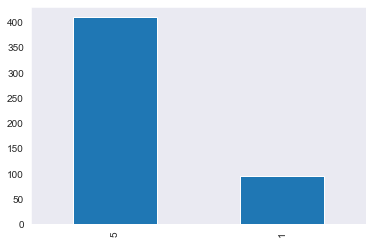

In [10]:
df['Stars'].value_counts().plot(kind = 'bar')

### Positive reviews : 

In [11]:
pos_reviews = (df['sentiment'] > 0).sum()
pos_reviews

466

In [12]:
pos_reviews_pct = (pos_reviews / len(df['sentiment']))*100
pos_reviews_pct

92.27722772277228

### Negative reviews : 

In [13]:
neg_reviews = (df['sentiment'] < 0).sum()
neg_reviews

35

In [14]:
neg_reviews_pct = (neg_reviews / len(df['sentiment']))*100
neg_reviews_pct

6.9306930693069315

### Neutral reviews : 

In [15]:
neutral_reviews = (df['sentiment'] == 0).sum()
neutral_reviews

4

In [16]:
neutral_reviews_pct = (neutral_reviews / len(df['sentiment']))*100
neutral_reviews_pct

0.7920792079207921

### Split into training and testing datasets : 

In [17]:
reviews_best_worst = reviews[(reviews['Stars'] == 5) | (reviews['Stars'] == 1)]

X = reviews['Reviews']
y = reviews['Stars']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(378,)
(127,)
(378,)
(127,)


### Cleaning and pre-processing the data : 

In [18]:
def clean_text(text):
    text = text.lower()
    text = text.strip() ##To remove whitespaces.
    text = re.sub(r' +', ' ', text)
    text = re.sub(r"[-()\"#/@;:{}`+=~|.!?,'0-9]", "", text)
    return(text)

In [19]:
stop = set(nltk.corpus.stopwords.words('english'))

In [20]:
print(stop)

{'won', 'here', 'few', 'again', 'no', 'ours', 'my', 'do', 'was', 'isn', 'needn', 'you', 'during', "mustn't", 'mustn', 'as', 'can', 'don', 're', 'through', 'd', "shan't", 'wasn', "wasn't", 'not', "she's", 'it', 'we', "you'll", 'him', 'himself', 'an', 'themselves', 'under', 'while', "won't", 'how', 'will', 'very', 'of', 'am', 'weren', 'this', 'same', "weren't", "mightn't", 'each', 'myself', 'other', 'o', 'the', 'them', 'off', 'most', 'be', 'down', 'below', 'itself', 'what', 'some', 've', 'our', "you'd", 'until', 'on', 'should', "you're", 'more', 'than', 'y', 'herself', 'own', 'too', "hasn't", 'yourself', 'your', 'were', 'doing', 'now', 'whom', 'above', 'where', 'wouldn', 'her', 'about', 'between', 'why', 'did', 'with', 'being', 'nor', 'both', 'has', "shouldn't", 'but', 'i', 'their', 'or', 'hers', 'to', 'yours', "didn't", 'because', 'doesn', 'which', 'any', 'ourselves', "couldn't", 'hadn', 'out', "hadn't", 'me', 'haven', "aren't", 'those', 'been', "haven't", 'who', 'have', 'had', 'over', 

In [21]:
import string
def pre_process(text):
    #text = text.str.replace('/','')
    #text = text.apply(lambda x: re.sub("  s"," ", x))
    #text = re.sub(r"[-()\"#/@;:{}`+=~|.!?,']", "", text)
    #text = re.sub(r'[0-9]+', '', text)
    #text = text.apply(lambda x: " ".join(x.translate(str.maketrans('', '', string.punctuation)) for x in x.split() if x.isalpha()))
    text = text.apply(lambda x: " ".join(x for x in x.split() if x not in stop))
    #text = text.apply(lambda x: str(TextBlob(x).correct()))
    text = text.apply(lambda x: " ".join(PorterStemmer().stem(word) for word in x.split()))
    #text = text.apply(lambda x: " ".join(stemmer_func(word) for word in x.split()))
    #text = text.apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
    #text = text.apply(lambda x: " ".join(word for word, pos in pos_tag(x.split()) if pos not in ['NN','NNS','NNP','NNPS']))
    return(text)

In [22]:
X_train = X_train.apply(lambda x: clean_text(x))
X_test = X_test.apply(lambda x: clean_text(x))

In [23]:
X_train=pre_process(X_train)
X_test=pre_process(X_test)

In [24]:
X_train[0]

'great job wyndham capit person profession help us move refin process smoothli thank'

### Vectorization for both training and testing datasets : 

In [25]:
#Train
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(1, 1 ), min_df=5, encoding='latin-1' , max_features=800)
xtrain_count = count_vect.fit_transform(X_train)

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(xtrain_count)

#Test
#count_vect = CountVectorizer()
xtest_count = count_vect.transform(X_test)

#tfidf_transformer = TfidfTransformer()
X_test_tfidf = tfidf_transformer.transform(xtest_count)

### Document Term Matrix (DTM) : 

In [26]:
dtm = pd.DataFrame(X_train_tfidf.toarray(), columns=count_vect.get_feature_names())

In [27]:
dtm

,aaron,abl,absolut,accept,accommod,account,accur,across,actual,adam,...,wonder,word,work,would,wouldnt,write,wrong,wyndham,year,yet
0,0.0,0.0,0.0,0.121916,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.00000,0.124476,0.0,0.0,0.0,0.092412,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.121479,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.119550,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.00000,0.122060,0.0,0.0,0.0,0.090618,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.275254,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.259329,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.0
374,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.17378,0.000000,0.0,0.0,0.0,0.000000,0.0
375,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.046682,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.0
376,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.102150,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.0


In [28]:
# ngram level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern='\w{1,}', ngram_range=(1, 3), max_df=0.9,min_df=0.001)
tfidf_vect_ngram.fit(df['Reviews'])
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(X_train)
xtest_tfidf_ngram =  tfidf_vect_ngram.transform(X_test)

In [29]:
# characters level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', token_pattern='\w{1,}', ngram_range=(1,3), max_df=0.9,min_df=0.001)
tfidf_vect_ngram_chars.fit(df['Reviews'])
xtrain_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(X_train) 
xtest_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(X_test)

### Topic modelling using Latent Dirichlet Allocation (LDA), that is, choosing the most important topics documents contain with some probabilty : 

In [34]:
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
number_topics = 20
number_words = 50

lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit_transform(X_train_tfidf)

print("Topics found via LDA:")
print_topics(lda, count_vect, number_words)

Topics found via LDA:

Topic #0:
jon patient well find follow mortgag job get accur done famili repres husband loan someon michel simpl satisfi quick friend challeng compar look commun onlin along barrett circumst compani approv sign document rate help consid hung name anyon extrem product made expect process knowledg ask told much side delay excel

Topic #1:
get close rate time triumph go busi loan would lender end lend said thank abl inform best didnt one cost made team sent back know credit call day took aaron guarante still payment profession pay els deal told went servic process sure move begin compani smoothli help buy bank much

Topic #2:
respons inform dean return surpris big guy good may unpleas convent money work dedic list consid fantast certainli statu client product confid option gave top met offer quickli right abl commun three best unprofession profession sinc continu decid imagin opportun staff find spent respect paid far clear differ updat impress

Topic #3:
adam loan 

In [35]:
frequency_words_wo_stop= {}
for data in reviews['Reviews']:
    tokens = nltk.wordpunct_tokenize(data.lower())
    for token in tokens:
        if token.lower() not in stop:
            if token in frequency_words_wo_stop:
                count = frequency_words_wo_stop[token]
                count = count + 1
                frequency_words_wo_stop[token] = count
            else:
                frequency_words_wo_stop[token] = 1

In [36]:
frequency_words_wo_stop

{'great': 139,
 'job': 25,
 ',': 1135,
 'wyndham': 16,
 'capital': 12,
 '!': 222,
 'person': 17,
 'professional': 70,
 'helped': 35,
 'us': 207,
 'move': 12,
 'refinance': 70,
 'process': 253,
 'smoothly': 15,
 '.': 1976,
 'thank': 50,
 'matthew': 3,
 'richardson': 1,
 'helpful': 56,
 'find': 19,
 'correct': 1,
 'product': 10,
 'mortgage': 147,
 'much': 38,
 'excellent': 30,
 'service': 99,
 'past': 13,
 'experience': 110,
 'would': 246,
 'without': 29,
 'question': 7,
 'use': 48,
 'needed': 29,
 '!!': 24,
 'went': 70,
 'beyond': 25,
 'extra': 19,
 'mile': 8,
 'right': 28,
 'wrong': 7,
 'encountered': 7,
 'servicer': 3,
 'dealing': 14,
 'previous': 13,
 'loan': 313,
 'pulled': 4,
 'together': 8,
 'found': 16,
 'viable': 3,
 'option': 8,
 'ultimately': 5,
 'saved': 7,
 'money': 22,
 'highly': 65,
 'recommend': 156,
 'brad': 7,
 'thomka': 3,
 'team': 113,
 'needs': 27,
 'sincerest': 2,
 'thanks': 61,
 'ed': 2,
 '&': 30,
 'lind': 1,
 'beginning': 32,
 'started': 17,
 'stressful': 24,
 'ti

In [37]:
from wordcloud import WordCloud ,STOPWORDS

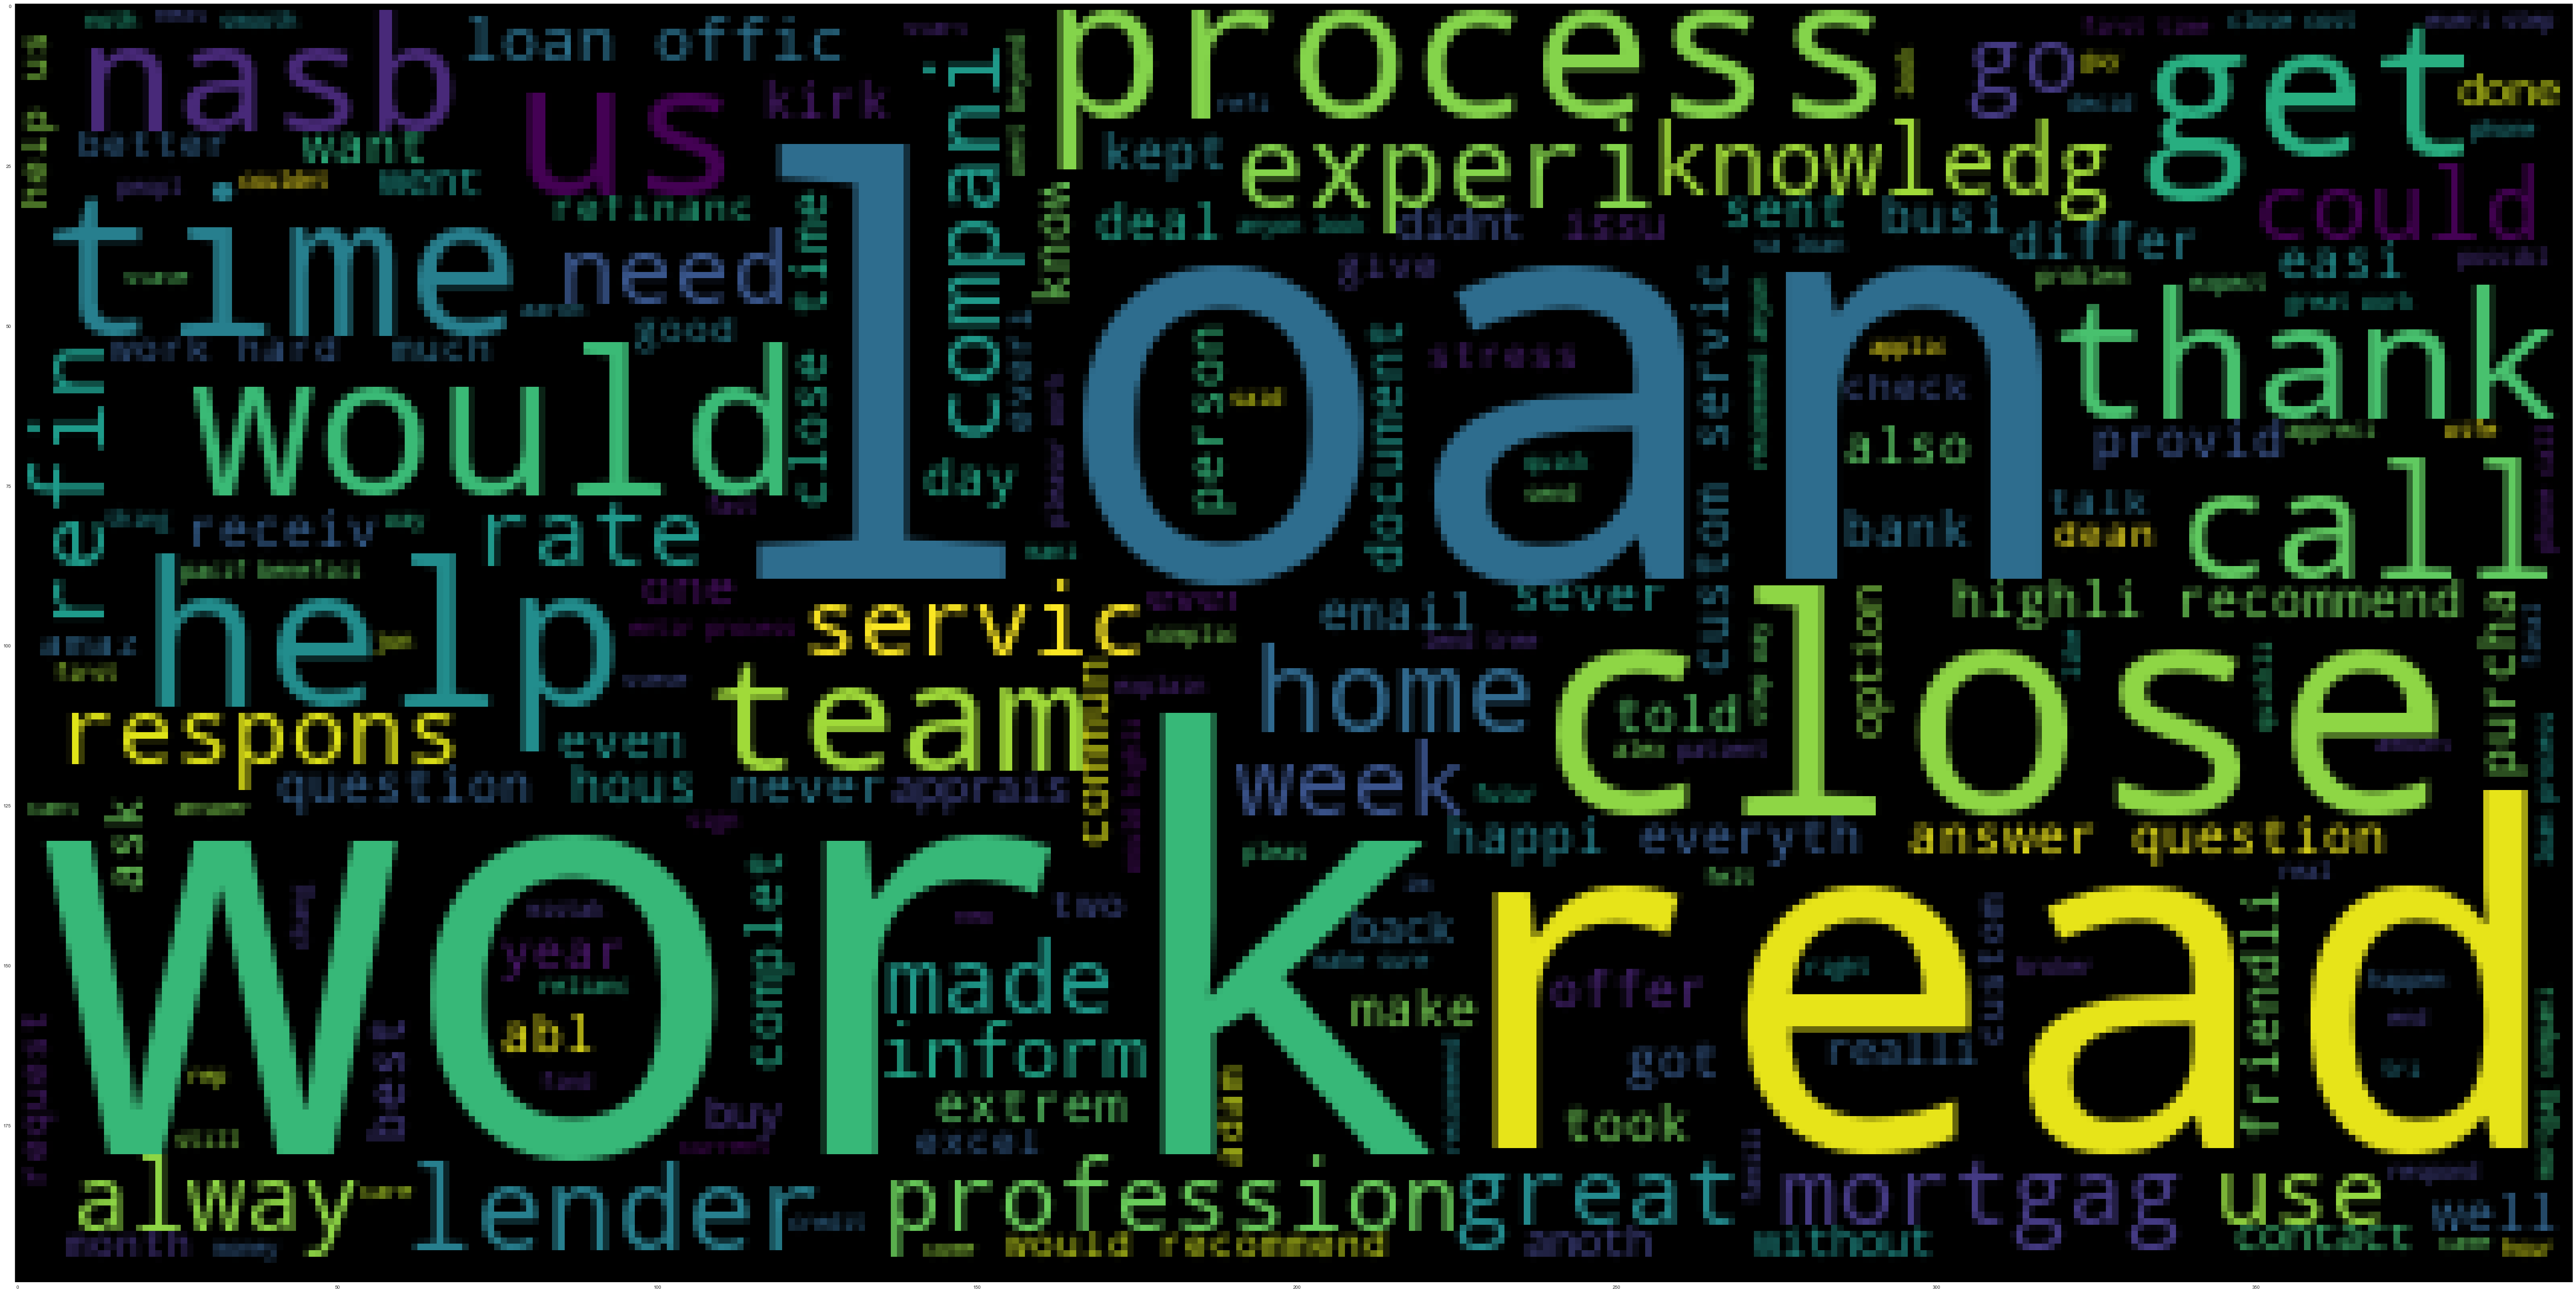

In [38]:
wordcloud = WordCloud(stopwords=[]).generate(' '.join(X_train.tolist()))

%matplotlib inline
fig = plt.figure(figsize=(200,50))
plt.imshow(wordcloud)

### Trying on different machine learning models : 

In [39]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid,  valid_y, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    
    return metrics.accuracy_score(predictions, valid_y)

##### Naive Bayes : 

In [40]:
accuracy_L1 = train_model(naive_bayes.MultinomialNB(), X_train_tfidf, y_train, X_test_tfidf, y_test)
print("NB  for L1, Count Vectors: ", accuracy_L1)


accuracy_L1 = train_model(naive_bayes.MultinomialNB(), xtrain_count, y_train, xtest_count, y_test)
print("NB  for L1, WordLevel TF-IDF: ", accuracy_L1)


accuracy_L1 = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram, y_train, xtest_tfidf_ngram, y_test)
print("NB  for L1, N-Gram Vectors: ", accuracy_L1)


accuracy_L1 = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram_chars, y_train, xtest_tfidf_ngram_chars, y_test)
print("NB for L1, CharLevel Vectors: ", accuracy_L1)

NB  for L1, Count Vectors:  0.889763779527559
NB  for L1, WordLevel TF-IDF:  0.9606299212598425
NB  for L1, N-Gram Vectors:  0.8031496062992126
NB for L1, CharLevel Vectors:  0.8031496062992126


##### Logistic Regression

In [41]:
accuracy_L1 = train_model(LogisticRegression(), X_train_tfidf, y_train, X_test_tfidf, y_test)
print("LR  for L1, Count Vectors: ", accuracy_L1)


accuracy_L1 = train_model(LogisticRegression(), xtrain_count, y_train, xtest_count, y_test)
print("LR  for L1, WordLevel TF-IDF: ", accuracy_L1)


accuracy_L1 = train_model(LogisticRegression(), xtrain_tfidf_ngram, y_train, xtest_tfidf_ngram, y_test)
print("LR  for L1, N-Gram Vectors: ", accuracy_L1)


accuracy_L1 = train_model(LogisticRegression(), xtrain_tfidf_ngram_chars, y_train, xtest_tfidf_ngram_chars, y_test)
print("LR for L1, CharLevel Vectors: ", accuracy_L1)

LR  for L1, Count Vectors:  0.8661417322834646
LR  for L1, WordLevel TF-IDF:  0.9212598425196851
LR  for L1, N-Gram Vectors:  0.8503937007874016
LR for L1, CharLevel Vectors:  0.8582677165354331


##### LinearSVC

In [45]:
accuracy_L1 = train_model(svm.LinearSVC(), X_train_tfidf, y_train, X_test_tfidf, y_test)
print("SVC  for L1, Count Vectors: ", accuracy_L1)


accuracy_L1 = train_model(svm.LinearSVC(), xtrain_count, y_train, xtest_count, y_test)
print("SVC  for L1, WordLevel TF-IDF: ", accuracy_L1)


accuracy_L1 = train_model(svm.LinearSVC(), xtrain_tfidf_ngram, y_train, xtest_tfidf_ngram, y_test)
print("SVC  for L1, N-Gram Vectors: ", accuracy_L1)


accuracy_L1 = train_model(svm.LinearSVC(), xtrain_tfidf_ngram_chars, y_train, xtest_tfidf_ngram_chars, y_test)
print("SVC for L1, CharLevel Vectors: ", accuracy_L1)

SVC  for L1, Count Vectors:  0.968503937007874
SVC  for L1, WordLevel TF-IDF:  0.937007874015748
SVC  for L1, N-Gram Vectors:  0.9448818897637795
SVC for L1, CharLevel Vectors:  0.9606299212598425


##### ANN : 

In [43]:
from sklearn.neural_network import MLPClassifier

In [46]:
accuracy_L1 = train_model(MLPClassifier(), X_train_tfidf, y_train, X_test_tfidf, y_test)
print("ANN  for L1, Count Vectors: ", accuracy_L1)


accuracy_L1 = train_model(MLPClassifier(), xtrain_count, y_train, xtest_count, y_test)
print("ANN  for L1, WordLevel TF-IDF: ", accuracy_L1)


accuracy_L1 = train_model(MLPClassifier(), xtrain_tfidf_ngram, y_train, xtest_tfidf_ngram, y_test)
print("ANN  for L1, N-Gram Vectors: ", accuracy_L1)


accuracy_L1 = train_model(MLPClassifier(), xtrain_tfidf_ngram_chars, y_train, xtest_tfidf_ngram_chars, y_test)
print("ANN for L1, CharLevel Vectors: ", accuracy_L1)

ANN  for L1, Count Vectors:  0.9763779527559056
ANN  for L1, WordLevel TF-IDF:  0.952755905511811
ANN  for L1, N-Gram Vectors:  0.952755905511811
ANN for L1, CharLevel Vectors:  0.9763779527559056


### Adding features to a document term matrix (dtm) : 

In [47]:
reviews = reviews[(reviews['Stars']==5) | (reviews['Stars']==1)]

feature_cols = ['Reviews','sentiment']
X = reviews[feature_cols]
y = reviews.Stars

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1)

In [48]:
vect = TfidfVectorizer(lowercase=True, stop_words='english', max_df=0.9,min_df=0.001, ngram_range=(2,3))
X_train_dtm = vect.fit_transform(X_train['Reviews'])
X_test_dtm = vect.transform(X_test['Reviews'])
print(X_train_dtm.shape)
print(X_test_dtm.shape)

# shape of other four feature columns
X_train.drop('Reviews', axis=1).shape

(378, 16904)
(127, 16904)


(378, 1)

In [50]:
extra = sparse.csr_matrix(X_train.drop('Reviews', axis=1).astype(float))
extra.shape

X_train_dtm_extra = sparse.hstack((X_train_dtm, extra))
print(X_train_dtm_extra.shape)

extra = sparse.csr_matrix(X_test.drop('Reviews', axis=1).astype(float))
X_test_dtm_extra = sparse.hstack((X_test_dtm, extra))
print(X_test_dtm_extra.shape)

(378, 16905)
(127, 16905)


##### Logistic Regression (with all the features)  : 

In [61]:
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train_dtm_extra, y_train)
y_pred_class = logreg.predict(X_test_dtm_extra)
acc_log=metrics.accuracy_score(y_test, y_pred_class)
acc_log

0.9448818897637795

##### ANN (with all the features)  : 

In [54]:
mp = MLPClassifier()
mp.fit(X_train_dtm_extra, y_train)
y_pred_class = mp.predict(X_test_dtm_extra)
acc_mlp1=metrics.accuracy_score(y_test, y_pred_class)
acc_mlp1

0.937007874015748

##### Gradient Boosting Classifier (with all the features)  : 

In [58]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train_dtm_extra, y_train)
y_pred_class = gbc.predict(X_test_dtm_extra)
acc_grad1=metrics.accuracy_score(y_test, y_pred_class)
acc_grad1

0.9291338582677166

### Confusion matrix : 

Text(0.5, 16.0, 'Predicted label')

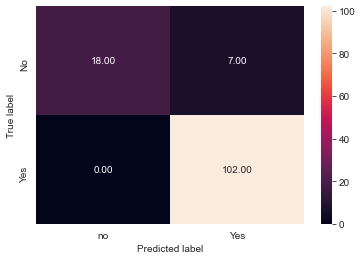

In [62]:
cm = metrics.confusion_matrix( y_test, y_pred_class)
sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["no", "Yes"] , yticklabels = ["No", "Yes"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')